In [18]:
#%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np
provider = IBMQ.load_account()

    
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

#contants
n = 4
lambd = 0.5

def thetak(k):
    num = lambd - np.cos(2*np.pi*k/n)
    denom = np.sqrt( (lambd-np.cos(2*np.pi*k/n))**2 + np.sin(2*np.pi*k/n)**2)
    theta = np.arccos(num/denom)
    return theta

#create quantum circuit
qc = QuantumCircuit(4, 4)

#create Quantum operators

F1_dag = Operator([
    [1, 0, 0, 0],
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0, 1/np.sqrt(2)*np.exp(-2*np.pi*1j/n), -1/np.sqrt(2)*np.exp(-2*np.pi*1j/n), 0],
    [0, 0, 0, -np.exp(-2*np.pi*1j/n)]])

F0_dag = Operator([
    [1, 0, 0, 0],
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0],
    [0, 0, 0, -1]])
B1_dag = Operator([
    [np.cos(thetak(1.)/2), 0, 0, 1j*np.sin(thetak(1.)/2)],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [ 1j*np.sin(thetak(1.)/2),0,0,np.cos(thetak(1.)/2)]])

fswap = Operator([
        [1,0,0,0],
        [0,0,1,0],
        [0,1,0,0],
        [0,0,0,-1]
])



#Create quantum Gates
qc.unitary(B1_dag, [0, 1], label='B1_dag')
qc.unitary(F1_dag, [0, 1], label='F1_dag')
qc.unitary(F0_dag, [2, 3], label='F0_dag')
qc.unitary(fswap,[1,2],label ='fSWAP')
qc.unitary(F0_dag, [0, 1], label='F0_dag')
qc.unitary(F0_dag, [2, 3], label='F0_dag')
qc.unitary(fswap,[1,2],label ='fSWAP')

qc.barrier()
#Set measurement step
for i in range(0,4):
    qc.measure(i,i)

#display circuit
qc.draw()


ibmqfactory.load_account:WARNING:2021-02-05 11:10:27,835: Credentials are already in use. The existing account in the session will be replaced.


┌─────────┐┌─────────┐          ┌─────────┐           ░ ┌─┐         
q_0: ┤0        ├┤0        ├──────────┤0        ├───────────░─┤M├─────────
     │  B1_dag ││  F1_dag │┌────────┐│  F0_dag │┌────────┐ ░ └╥┘┌─┐      
q_1: ┤1        ├┤1        ├┤0       ├┤1        ├┤0       ├─░──╫─┤M├──────
     ├─────────┤└─────────┘│  fSWAP │├─────────┤│  fSWAP │ ░  ║ └╥┘┌─┐   
q_2: ┤0        ├───────────┤1       ├┤0        ├┤1       ├─░──╫──╫─┤M├───
     │  F0_dag │           └────────┘│  F0_dag │└────────┘ ░  ║  ║ └╥┘┌─┐
q_3: ┤1        ├─────────────────────┤1        ├───────────░──╫──╫──╫─┤M├
     └─────────┘                     └─────────┘           ░  ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                              0  1  2  3

$ \newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$ \newcommand{\bra}[1]{\left\langle{#1}\right|}$
$$ \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

when it comes to implementation:  
first try to run circuit on simulator 
second try to run on real hardware

long term goal is reproduce figures 5 (Ground state of a spin chain)and 6 (time evolution of operator $\sigma_z$) 

short term goal is initialize the state to  $ \ket{0000}  $ and $\ket{ 1100} $

Job Status: job has successfully run


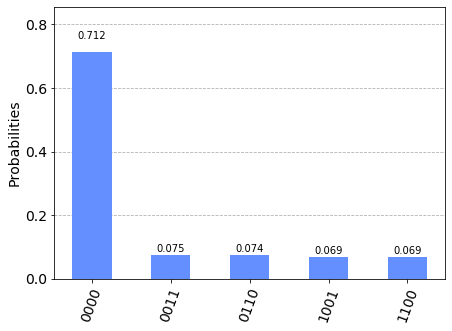

In [19]:
#Start up and initialize circuit
#Measurement

    
    #Choose provider and backend
#provider = IBMQ.get_provider()
#provider = AerProvider()
#backend = Aer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')
#backend = provider.get_backend('ibmq_qasm_simulator')
#backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmqx2')
#backend = provider.get_backend('ibmq_16_melbourne')

shots = 1024
max_credits = 10 #Max number of credits to spend on execution
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result = job_exp.result()
counts = result.get_counts(qc)
plot_histogram(counts)



In [20]:
phi = np.arccos(lambd/np.sqrt(1+lambd**2))/2
print("|0000> probability should be: ",np.cos(phi)**2)
print("|0011> probability should be: ",np.sin(phi)**2 )

|0000> probability should be:  0.723606797749979
|0011> probability should be:  0.276393202250021
